<a href="https://colab.research.google.com/github/2303a51063/AIMI-2025_B16/blob/main/2303A51063_Q11_B16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

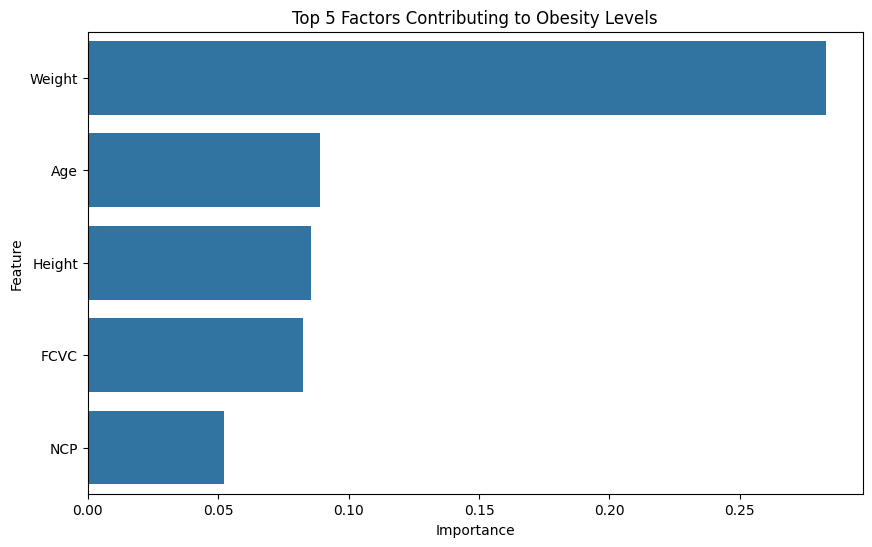

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import zipfile


with zipfile.ZipFile('/content/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition.zip') as zip_ref:
    zip_ref.extractall('path_to_extract')

data = pd.read_csv('path_to_extract/ObesityDataSet_raw_and_data_sinthetic.csv')  # Use the correct path after extraction

print(data.head())
print(data.isnull().sum())
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']
X = pd.get_dummies(X, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

importances = clf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Top 5 Factors Contributing to Obesity Levels:")
print(importance_df.head())

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(5))
plt.title('Top 5 Factors Contributing to Obesity Levels')
plt.show()

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

<Figure size 1000x600 with 0 Axes>

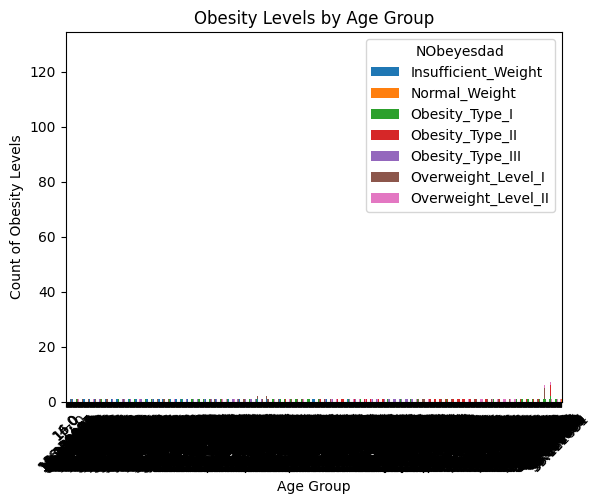

No obesity level found in the 'NObeyesdad' column.


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/content/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition.zip')

print(data.head())

obesity_by_age = data.groupby('Age')['NObeyesdad'].value_counts().unstack().fillna(0)

plt.figure(figsize=(10, 6))
obesity_by_age.plot(kind='bar', stacked=True)
plt.title('Obesity Levels by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count of Obesity Levels')
plt.xticks(rotation=45)
plt.show()
if 'Obesity_Level_I' in data['NObeyesdad'].values:
    obese_counts = data[data['NObeyesdad'] == 'Obesity_Level_I'].groupby('Age').size()

elif 'Obesity_Level_II' in data['NObeyesdad'].values:
    obese_counts = data[data['NObeyesdad'] == 'Obesity_Level_II'].groupby('Age').size()

elif 'Obesity_Level_III' in data['NObeyesdad'].values:
    obese_counts = data[data['NObeyesdad'] == 'Obesity_Level_III'].groupby('Age').size()
else:
    print("No obesity level found in the 'NObeyesdad' column.")
    obese_counts = pd.Series([], dtype=int)

if not obese_counts.empty:

    max_age_group = obese_counts.idxmax()
    max_count = obese_counts.max()

    print(f"The age group with the highest obesity rate is: {max_age_group} with {max_count} cases.")

In [25]:
import pandas as pd

# Load the dataset (replace with your actual file path)
data = pd.read_csv('/content/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition.zip')

# Preview the dataset to find the correct column names for weight and obesity status
print(data.head())
print(data.columns)

# Filter the dataset to include only patients with obesity (assuming 'NObeyesdad' is the column for obesity level)
# Replace 'NObeyesdad' and 'Weight' with the correct column names if they differ in your dataset
obesity_data = data[data['NObeyesdad'] == 'Obese']  # Filter only patients marked as 'Obese'

# Find the maximum and minimum weight of patients with obesity
max_weight = obesity_data['Weight'].max()
min_weight = obesity_data['Weight'].min()

print(f"The maximum weight of obese patients is: {max_weight}")
print(f"The minimum weight of obese patients is: {min_weight}")


   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

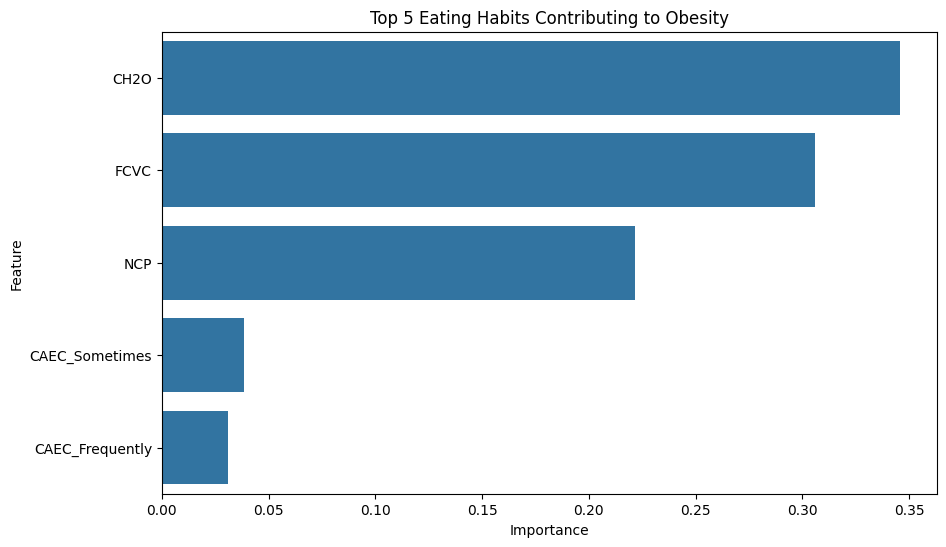

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('/content/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition.zip')

print(data.head())
print(data.columns)

eating_habits = ['FAVC', 'FCVC', 'NCP', 'CAEC', 'CH2O']
X = data[eating_habits]
y = data['NObeyesdad']
X = pd.get_dummies(X, columns=['FAVC', 'CAEC'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
importances = clf.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

top_eating_habits = importance_df.sort_values(by='Importance', ascending=False).head(5)
print("Top 5 Eating Habits Contributing to Obesity:")
print(top_eating_habits)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_eating_habits)
plt.title('Top 5 Eating Habits Contributing to Obesity')
plt.show()

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

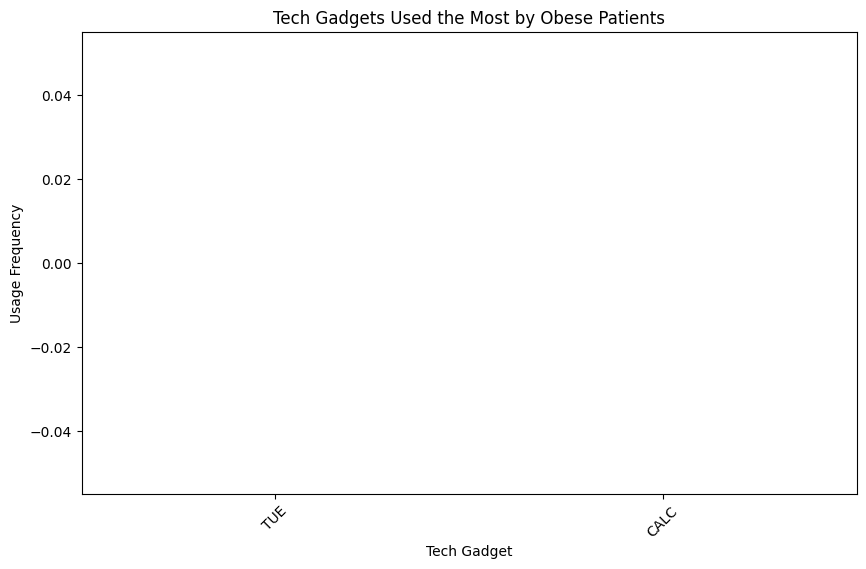

The most used tech gadget by obese patients is: TUE with 0.0 instances of usage.


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/content/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition.zip')

print(data.head())
print(data.columns)
print(data['NObeyesdad'].unique())
obese_patients = data[data['NObeyesdad'].isin(['Obesity_Level_I', 'Obesity_Level_II', 'Obesity_Level_III'])]

tech_gadgets = ['TUE', 'CALC']
tech_usage = obese_patients[tech_gadgets].sum()

plt.figure(figsize=(10, 6))
tech_usage.plot(kind='bar', color='skyblue')
plt.title('Tech Gadgets Used the Most by Obese Patients')
plt.xlabel('Tech Gadget')
plt.ylabel('Usage Frequency')
plt.xticks(rotation=45)
plt.show()

most_used_gadget = tech_usage.idxmax()
max_usage = tech_usage.max()

print(f"The most used tech gadget by obese patients is: {most_used_gadget} with {max_usage} instances of usage.")

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder for encoding categorical features

# Load the dataset (replace with your actual file path)
data = pd.read_csv('/content/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition.zip')

# Preview the dataset to inspect the columns
print(data.head())
print(data.columns)

# Assume the target column for obesity level is 'NObeyesdad' (adjust as needed)
# Features (input variables)
X = data.drop('NObeyesdad', axis=1)  # Drop target column
y = data['NObeyesdad']  # Target column indicating obesity level

# Convert categorical features to numerical using Label Encoding
for column in X.select_dtypes(include=['object']).columns:  # Select object type columns for encoding
    label_encoder = LabelEncoder()
    X[column] = label_encoder.fit_transform(X[column])  # Encode the categorical values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        